<a href="https://colab.research.google.com/github/vallirajasekar/GeminiLLM-Application/blob/main/Gemini_API_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PYTHON SDK FOR THE GEMINI API

In [3]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 1.2 MB/s eta 0:00:00


## Import Package

In [4]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import Markdown,display

## Setup your API key

In [5]:
from google.colab import userdata


In [6]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

## Connecting with the Generative AI key

In [7]:
genai.configure(api_key=GOOGLE_API_KEY)

In [8]:
for model in genai.list_models():
  print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [9]:
for models in genai.list_models():
  if 'generateContent' in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [10]:
## Generate Text from Text

In [11]:
model=genai.GenerativeModel('gemini-pro')

In [12]:
response=model.generate_content('What is random forest')
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "**Random Forest**\n\nRandom forest is an ensemble learning algorithm that consists of multiple decision trees trained on different subsets of the data. It combines the predictions of these decision trees to improve overall accuracy and robustness.\n\n**Key Components:**\n\n* **Decision Trees:** Individual decision trees are grown using a random subset of features at each node.\n* **Bagging (Bootstrap Aggregating):** Each decision tree is trained on a different sample of the data, generated through random sampling with replacement.\n* **Random Feature Selection:** At each node of each tree, a random subset of features is used to determine the best split.\n\n**How it Works:**\n\n1. **Train Multiple Decision Trees:** A large number of decision trees are created

In [13]:
response.text

'**Random Forest**\n\nRandom forest is an ensemble learning algorithm that consists of multiple decision trees trained on different subsets of the data. It combines the predictions of these decision trees to improve overall accuracy and robustness.\n\n**Key Components:**\n\n* **Decision Trees:** Individual decision trees are grown using a random subset of features at each node.\n* **Bagging (Bootstrap Aggregating):** Each decision tree is trained on a different sample of the data, generated through random sampling with replacement.\n* **Random Feature Selection:** At each node of each tree, a random subset of features is used to determine the best split.\n\n**How it Works:**\n\n1. **Train Multiple Decision Trees:** A large number of decision trees are created using the aforementioned techniques.\n2. **Make Predictions:** Each tree makes predictions on new data independently.\n3. **Aggregate Predictions:** The final prediction is made by combining the predictions from all the individual

In [14]:
response.candidates

[content {
  parts {
    text: "**Random Forest**\n\nRandom forest is an ensemble learning algorithm that consists of multiple decision trees trained on different subsets of the data. It combines the predictions of these decision trees to improve overall accuracy and robustness.\n\n**Key Components:**\n\n* **Decision Trees:** Individual decision trees are grown using a random subset of features at each node.\n* **Bagging (Bootstrap Aggregating):** Each decision tree is trained on a different sample of the data, generated through random sampling with replacement.\n* **Random Feature Selection:** At each node of each tree, a random subset of features is used to determine the best split.\n\n**How it Works:**\n\n1. **Train Multiple Decision Trees:** A large number of decision trees are created using the aforementioned techniques.\n2. **Make Predictions:** Each tree makes predictions on new data independently.\n3. **Aggregate Predictions:** The final prediction is made by combining the pred

In [15]:
response.parts

[text: "**Random Forest**\n\nRandom forest is an ensemble learning algorithm that consists of multiple decision trees trained on different subsets of the data. It combines the predictions of these decision trees to improve overall accuracy and robustness.\n\n**Key Components:**\n\n* **Decision Trees:** Individual decision trees are grown using a random subset of features at each node.\n* **Bagging (Bootstrap Aggregating):** Each decision tree is trained on a different sample of the data, generated through random sampling with replacement.\n* **Random Feature Selection:** At each node of each tree, a random subset of features is used to determine the best split.\n\n**How it Works:**\n\n1. **Train Multiple Decision Trees:** A large number of decision trees are created using the aforementioned techniques.\n2. **Make Predictions:** Each tree makes predictions on new data independently.\n3. **Aggregate Predictions:** The final prediction is made by combining the predictions from all the ind

In [16]:
response.prompt_feedback

In [17]:
response=model.generate_content('What is random forest',stream=True)
for chunk in response:
  print(chunk.text)
  print("___"*80)


**Random Forest**

Random forest is a supervised machine learning algorithm that consists of
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 an ensemble of decision trees. It is widely used for both classification and regression tasks.

**How it Works:**

1. **Bootstrapping:** Multiple
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 training sets are created by randomly sampling from the original dataset with replacement. This ensures that some data points may appear multiple times in each training set while others may not.
2. **Tree Building:** For each training set, a decision tree is constructed using 

In [18]:
response=model.generate_content('What is Xgboost',stream=True)
for chunk in response:
  print(chunk.text)
  print("___"*80)


**XGBoost (eXtreme Gradient Boosting)**

XGBoost is
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 an open-source, tree-based machine learning algorithm designed for tasks such as classification, regression, and ranking. It is particularly well-suited for problems with
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 large datasets and high dimensionality.

**Key Features:**

* **Gradient Boosting:** XGBoost builds an ensemble of decision trees sequentially, where each tree is trained to correct the errors made by the previous ones.
* **Regularization:** It uses L1 and L2 regularization to prevent overfit

## Generate Text from the Image

In [19]:
!curl -o image.jpg https://qph.cf2.quoracdn.net/main-qimg-f366ce94b3b0402cfbed70398849423b.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37206  100 37206    0     0   131k      0 --:--:-- --:--:-- --:--:--  131k


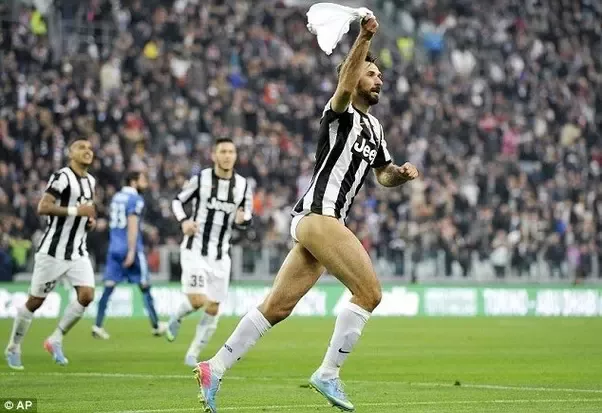

In [20]:
import PIL.Image
img=PIL.Image.open('image.jpg')
img

In [21]:
model=genai.GenerativeModel('gemini-pro-vision')

In [22]:
response=model.generate_content(img)

In [23]:
response.text

' The image shows a footballer celebrating a goal. He is wearing only a vest and socks. His shorts have fallen down.'

In [24]:
response=model.generate_content(["Write about name of the player and Why is the celebration mean to him",img],stream=True)

In [25]:
response.resolve()

In [26]:
response.text

" Arturo Vidal celebrates scoring a goal for Juventus against Udinese in 2014. The Chilean midfielder is known for his passionate goal celebrations, and this one was no different. He ripped off his shirt and waved it in the air, showing off his muscular physique. The celebration was a sign of Vidal's joy and passion for the game, and it also served as a warning to his opponents. Vidal is a fierce competitor, and he is always willing to fight for his team. He is a valuable asset to Juventus, and he is one of the best midfielders in the world."

In [27]:
!curl -o image.jpg https://img.mensxp.com/media/content/2021/Nov/Image-1-Credit-Reuters-8_619665f3a409c.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  173k    0  173k    0     0   357k      0 --:--:-- --:--:-- --:--:--  357k


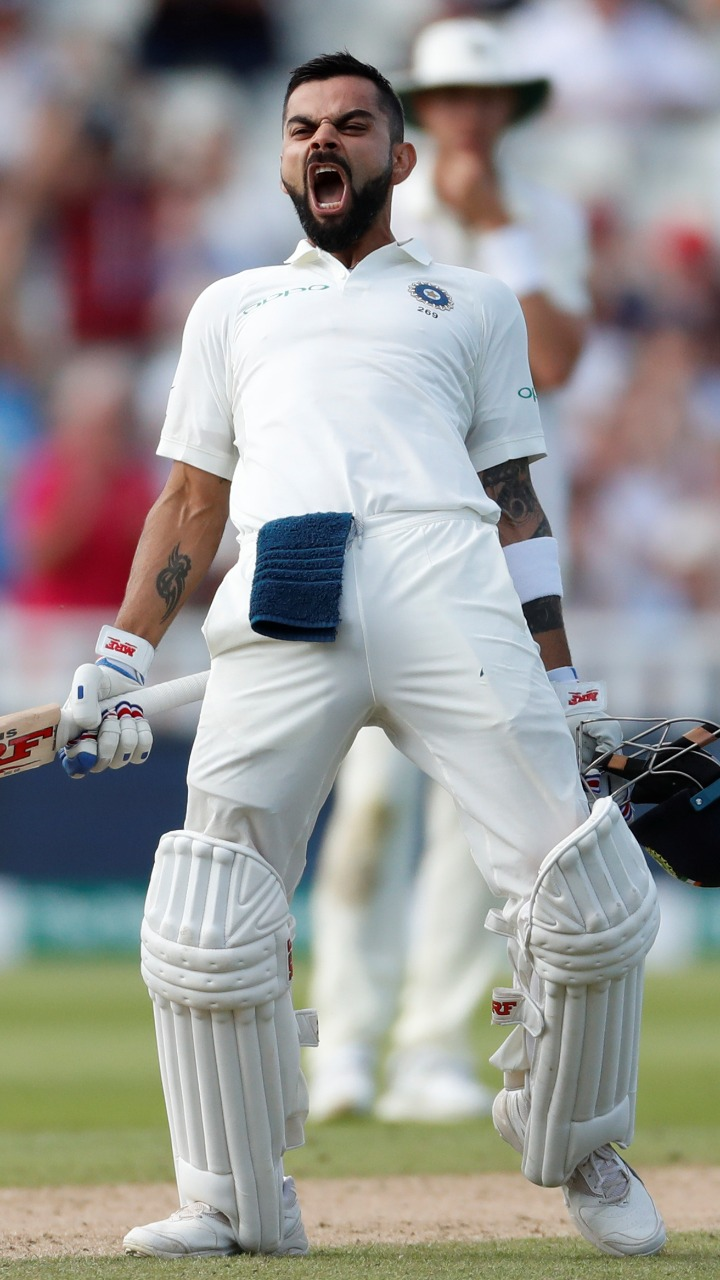

In [28]:
import PIL.Image
img=PIL.Image.open('image.jpg')
img

In [29]:
response=model.generate_content(img)

In [30]:
response=model.generate_content(["Write about name of the player and Why is the celebration mean to him",img],stream=True)

In [31]:
response.resolve()

In [32]:
response.text

' The name of the player is Virat Kohli. He is an Indian cricketer who plays for the Indian national team and the Royal Challengers Bangalore in the Indian Premier League. He is considered one of the best batsmen in the world and is known for his aggressive batting style.\n\nThe celebration means a lot to him because it is a way for him to express his joy and passion for the game. It is also a way for him to show his appreciation for the support of his fans.'

## Generation Configuration

In [33]:
model=genai.GenerativeModel('gemini-pro')

In [34]:
model.generate_content('What is random forest').text

'**Random Forest**\n\nRandom Forest is a powerful machine learning algorithm that combines multiple decision trees to enhance predictive accuracy and prevent overfitting. It belongs to the ensemble learning family, where multiple models are trained and combined to improve performance.\n\n**How it Works:**\n\nRandom Forest creates a multitude of decision trees. Each tree:\n\n* Is constructed using a random subset of the training data.\n* Uses a random subset of features (predictors) at each node.\n* Predicts a class or value based on majority voting or averaging of the predictions from individual trees.\n\n**Key Features:**\n\n* **Ensemble Learning:** Random Forest leverages multiple decision trees to reduce variance and enhance stability.\n* **Random Sampling:** The subsets of data and features introduce randomness and prevent overfitting.\n* **Feature Importance:** It provides insights into the relative importance of features in predicting the target variable.\n* **Handling Imbalanced

In [54]:
generation_config = genai.types.GenerationConfig(
    candidate_count=1,
    stop_sequences=["x"],
    max_output_tokens=50,
    temperature=0.4
)

In [55]:
response = model.generate_content('Speak about INDIA', generation_config=generation_config)


In [56]:
response.text

'**India: A Tapestry of Culture, History, and Diversity**\n\nIndia, a land of ancient civilizations, vibrant traditions, and breathtaking landscapes, is a captivating tapestry of diversity. Spanning over 3.2 million square kilometers, it is'

In [58]:
response.parts

[text: "**India: A Tapestry of Culture, History, and Diversity**\n\nIndia, a land of ancient civilizations, vibrant traditions, and breathtaking landscapes, is a captivating tapestry of diversity. Spanning over 3.2 million square kilometers, it is"
]

In [59]:
response.candidates

[content {
  parts {
    text: "**India: A Tapestry of Culture, History, and Diversity**\n\nIndia, a land of ancient civilizations, vibrant traditions, and breathtaking landscapes, is a captivating tapestry of diversity. Spanning over 3.2 million square kilometers, it is"
  }
  role: "model"
}
finish_reason: MAX_TOKENS
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

## Chat Conversations

In [60]:
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)

In [61]:
chat=model.start_chat(history=[])

In [62]:
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

In [63]:
response=chat.send_message('In one sentence,explain how a computer works to a young child')

In [64]:
response.text

'A computer is like a magical helper that can store your favorite games, movies, and pictures, and help you learn and create new things.'

In [66]:
chat.history

[parts {
   text: "In one sentence,explain how a computer works to a young child"
 }
 role: "user",
 parts {
   text: "A computer is like a magical helper that can store your favorite games, movies, and pictures, and help you learn and create new things."
 }
 role: "model"]

In [70]:
response=chat.send_message('In one sentence,explain how a computer works to a High School',stream=True)

In [72]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is a machine that can be programmed to execute a sequence of instructions in
________________________________________________________________________________
 order to perform a wide range of tasks.
________________________________________________________________________________


In [73]:
chat.history

[parts {
   text: "In one sentence,explain how a computer works to a young child"
 }
 role: "user",
 parts {
   text: "A computer is like a magical helper that can store your favorite games, movies, and pictures, and help you learn and create new things."
 }
 role: "model",
 parts {
   text: "In one sentence,explain how a computer works to a High School"
 }
 role: "user",
 parts {
   text: "A computer is an electronic device that can be programmed to carry out a set of instructions, performing mathematical and logical operations at high speed and with great accuracy."
 }
 role: "model",
 parts {
   text: "In one sentence,explain how a computer works to a High School"
 }
 role: "user",
 parts {
   text: "A computer is a machine that can be programmed to execute a sequence of instructions in order to perform a wide range of tasks."
 }
 role: "model"]

## Count Token

In [74]:
model.count_tokens('What is LLM')

total_tokens: 4

In [75]:
model.count_tokens('BEST PLAYER IN INDIA')

total_tokens: 4

In [76]:
model.count_tokens('In one sentence,explain how a computer works to a High School')

total_tokens: 13

## Embedding

In [77]:
result=genai.embed_content(
    model="models/embedding-001",
    content="What is meaning of life",
    task_type="retrieval_document",
    title='Embedding of Single String'


)

{'embedding': [-0.0048415484,
  -0.011589106,
  -0.015386352,
  -0.009038753,
  0.031347148,
  0.0029695395,
  0.050243925,
  0.0025381474,
  -0.023971349,
  0.010953756,
  -0.010398976,
  0.023914875,
  -0.008302422,
  -0.035985555,
  -0.010623768,
  -0.03704729,
  0.041190393,
  -0.0070020827,
  -0.008380305,
  -0.03666453,
  -0.020487923,
  -0.029013349,
  0.028154587,
  0.0077268947,
  -0.016762115,
  -0.015740637,
  0.038377807,
  -0.044428617,
  -0.016027164,
  0.024214152,
  -0.026391404,
  0.014668929,
  -0.0669242,
  -0.004404642,
  0.045350105,
  -0.043909945,
  0.012707105,
  -0.03406336,
  -0.07538629,
  0.014401794,
  0.04358844,
  -0.043179218,
  -0.04062119,
  -0.044142414,
  0.006066415,
  0.014949044,
  -0.018461961,
  0.046776094,
  0.022708002,
  -0.122232735,
  0.027436905,
  0.038052756,
  0.108670294,
  -0.019682819,
  -0.016073873,
  -0.025221244,
  0.049259275,
  -0.0006512151,
  -0.012991484,
  -0.030254062,
  0.0028950435,
  -0.01939429,
  0.007406429,
  0.038

## Safety Setting